In [ ]:
'''
!pip install nilearn
!pip install keras

!pip install pydotplus
!pip install graphviz
!pip install plot_model
'''

In [ ]:
from nilearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

#nilearn - neuroimaging tailored library
from nilearn.input_data import NiftiMapsMasker
from nilearn import plotting

#sklearn - basic ML tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import metrics

#keras - for NN models
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout,GRU,LSTM
from keras import optimizers
#from keras.utils import plot_model
from keras import utils
from sklearn.metrics import roc_curve

# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

#scipy- statistical analysis tools
from scipy.stats import ttest_1samp
from scipy import interp

from timeit import default_timer



In [ ]:
## load the smith (ICA based) mask
## 'rsn10': 10 ICA maps from the above that matched across task and rest
# http://brainmap.org/pubs/SmithPNAS09.pdf

smith_atlas = datasets.fetch_atlas_smith_2009()
smith_atlas_rs_networks = smith_atlas.rsn70

In [ ]:
from nilearn import datasets

datasets.fetch_adhd()


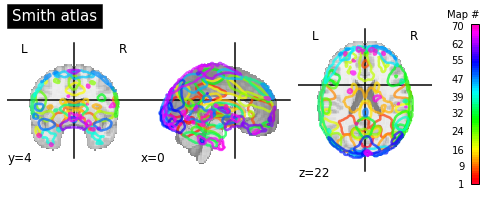

In [91]:
plotting.plot_prob_atlas(smith_atlas_rs_networks, 
                         title='Smith atlas',  
                         colorbar=True)
plotting.show()

In [92]:
# Import preprocessed, ready-to-go, datasets
adhd_data=datasets.fetch_adhd(n_subjects=40)

Contrast seed_based_glm computed.
Save z-map in 'dmn_z_map.png'.


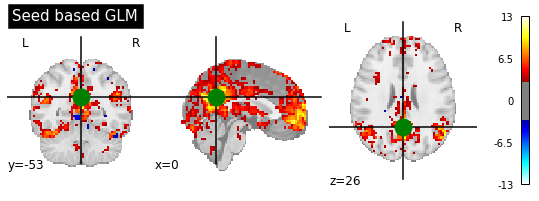

In [93]:
import numpy as np

from nilearn import datasets, plotting
from nilearn.input_data import NiftiSpheresMasker

from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.reporting import make_glm_report
# Prepare timing
t_r = 2.
slice_time_ref = 0.
n_scans = 176

# Prepare seed
pcc_coords = (0, -53, 26)

seed_masker = NiftiSpheresMasker([pcc_coords], radius=10, detrend=True,
                                 standardize=True, low_pass=0.1,
                                 high_pass=0.01, t_r=2.,
                                 memory='nilearn_cache',
                                 memory_level=1, verbose=0)
seed_time_series = seed_masker.fit_transform(adhd_data.func[0])
frametimes = np.linspace(0, (n_scans - 1) * t_r, n_scans)
design_matrix = make_first_level_design_matrix(frametimes, hrf_model='spm',
                                               add_regs=seed_time_series,
                                               add_reg_names=["pcc_seed"])
dmn_contrast = np.array([1] + [0] * (design_matrix.shape[1] - 1))
contrasts = {'seed_based_glm': dmn_contrast}

first_level_model = FirstLevelModel(t_r=t_r, slice_time_ref=slice_time_ref)
first_level_model = first_level_model.fit(run_imgs=adhd_data.func[0],
                                    design_matrices=design_matrix)

print('Contrast seed_based_glm computed.')
z_map = first_level_model.compute_contrast(contrasts['seed_based_glm'],
                                           output_type='z_score')

# Saving snapshots of the contrasts
filename = 'dmn_z_map.png'
display = plotting.plot_stat_map(z_map, threshold=3.0, title='Seed based GLM',
                                 cut_coords=pcc_coords)
display.add_markers(marker_coords=[pcc_coords], marker_color='g',
                    marker_size=300)
display.savefig(filename)
print("Save z-map in '{0}'.".format(filename))

report = make_glm_report(first_level_model,
                         contrasts=contrasts,
                         title='ADHD DMN Report',
                         cluster_threshold=15,
                         min_distance=8.,
                         plot_type='glass',
                         )

In [94]:
report

drift_model,cosine
drift_order,1
fir_delays,[0]
high_pass (Hz),0.01
hrf_model,glover
noise_model,ar1
scaling_axis,0
signal_scaling,0
slice_time_ref,0.0
smoothing_fwhm,None
standardize,False


In [95]:
datasets.fetch_adhd()

{'func': ['C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027018/0027018_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027034/0027034_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027037/0027037_rest_tshift_RPI_voreg_mni.n

In [96]:
adhd_data

{'func': ['C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0021019/0021019_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0023008/0023008_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0023012/0023012_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027011/0027011_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027018/0027018_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027034/0027034_rest_tshift_RPI_voreg_mni.nii.gz',
  'C:\\Users\\Gianyosha/nilearn_data\\adhd\\data/0027037/0027037_rest_tshift_RPI_voreg_mni.n

In [97]:
# exploring the header of one image 
import nibabel as nib
img=nib.load(adhd_data['func'][0])

print(img.header['dim'])
print(img.header['pixdim'])


[  4  61  73  61 176   1   1   1]
[-1.  3.  3.  3.  2.  0.  0.  0.]


In [98]:
# Region signals extraction- exctract the values of the ten networks

masker = NiftiMapsMasker(maps_img=smith_atlas_rs_networks,  # Smith stals
                         standardize=True, # centers and norms the time-series
                         memory='nilearn_cache', # cache
                         verbose=0) #do not print verbose
all_subjects_data=[]
labels=[]  # 1 if ADHD, 0 if control

for func_file, confound_file, phenotypic in zip(
        adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    
    all_subjects_data.append(time_series)
    labels.append(phenotypic['adhd'])


In [99]:
print('N control:' ,labels.count(0))
print('N adhd:' ,labels.count(1))

N control: 20
N adhd: 20


In [100]:
all_subjects_data[0].shape

(176, 70)

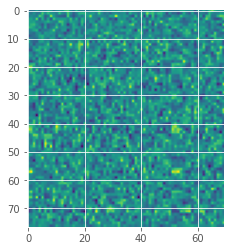

In [101]:
plt.imshow(all_subjects_data[5])

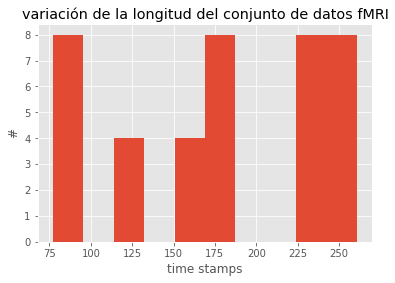

In [102]:
plt.hist([len(i) for i in all_subjects_data])
plt.title('variación de la longitud del conjunto de datos fMRI')
plt.xlabel('time stamps')
plt.ylabel('#')
plt.show()

In [103]:
# find the longest image
max_len_image=np.max([len(i) for i in all_subjects_data])


In [104]:
# reshape 

all_subjects_data_reshaped=[]
for subject_data in all_subjects_data:
  # Padding
  N= max_len_image-len(subject_data)
  padded_array=np.pad(subject_data, ((0, N), (0,0)), 
                      'constant', constant_values=(0))
  subject_data=padded_array
  subject_data=np.array(subject_data)
  subject_data.reshape(subject_data.shape[0],subject_data.shape[1],1)
  all_subjects_data_reshaped.append(subject_data)


In [105]:
# shape of data

# 40 subjects
# 261 time stamps
# 10 netwroks values

np.array(all_subjects_data_reshaped).shape

(40, 261, 70)

In [107]:
# The data, split between train and test sets.
import tensorflow as tf
def get_train_test(X, y, i, verbrose=False):
  '''
  split to train and test and reshape data
  X data
  y labels
  i random state
  '''
  X_train, X_test, y_train, y_test = train_test_split(X,
                                        y, test_size=0.2, random_state=i)



  # Reshapes data to 4D for Hierarchical RNN.
  t_shape=np.array(all_subjects_data_reshaped).shape[1]
  RSN_shape=np.array(all_subjects_data_reshaped).shape[2]
  
  X_train = np.reshape(X_train, (len(X_train), t_shape, RSN_shape))
  X_test = np.reshape(X_test, (len(X_test), t_shape, RSN_shape))

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  if verbrose:
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
  
  # Converts class vectors to binary class matrices.
  
  y_train = tf.keras.utils.to_categorical(y_train, 2)
  y_test = tf.keras.utils.to_categorical(y_test, 2)
  
  return X_train, X_test, y_train, y_test


In [108]:
#from plot_model import plot_model
#plot_model(model)
from tensorflow.python import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.9.1
2.6.0


In [109]:
X_train, X_test, y_train, y_test = get_train_test(all_subjects_data_reshaped,
                                                    labels, i=8, verbrose=True)


32 train samples
8 test samples


In [111]:
all_subjects_data_reshaped[2].shape

(261, 70)

# experimentos

In [112]:
import pandas as pd

In [113]:
X_=[]
y_=[]
for x in all_subjects_data_reshaped:
    X_.append(x.flatten())

for y in labels:
    y_.append(y)
    
X_=np.array(X_)
y_=np.array(y_)



In [114]:
y_.resize((40,1))

In [115]:
X_.shape,y_.shape

((40, 18270), (40, 1))

In [117]:
y_.shape

(40, 1)

In [118]:
#dfy=pd.DataFrame(y_)
#dfy.to_csv()

In [119]:
X_.shape,y_.shape

((40, 18270), (40, 1))

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV


In [198]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def standarScalerFit(x):
    scaler = StandardScaler()
    scaler.fit(x)
    print('entrenado')
    joblib.dump(scaler,'scaler.model')
    print('guardado')


def stadardPCAFit(x):
    pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=13)) ])
    pipe.fit(x)
    print('entrenado')
    joblib.dump(pipe,'scalerpca.model')
    print('guardado')

def standardScalerTransform(x):
    model=joblib.load('scaler.model')
    print('modelo cargado')
    return model.transform(x)

def standardScalerPCATransform(x):
    model=joblib.load('scalerpca.model')
    print('modelo cargado standar scaler')
    return model.transform(x)


In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_,test_size=0.2,random_state=2022)
X_train.shape, y_train.shape,X_test.shape,y_test.shape

standarScalerFit(X_)
stadardPCAFit(X_)
Xs_=standardScalerTransform(X_)
Xsk_=standardScalerPCATransform(X_)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_, y_,test_size=0.2,random_state=2022)
Xsk_train, Xsk_test, ysk_train, ysk_test = train_test_split(Xsk_, y_,test_size=0.2,random_state=2022)


entrenado
guardado
entrenado
guardado
modelo cargado
modelo cargado standar scaler


In [123]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout,GRU
from keras import Sequential


 

In [174]:
pipe = Pipeline([('svc', SVC())])
param_grid = [
  {'svc__C':[0.001,0.01,0.1,1, 10, 100, 1000] , 'svc__kernel': ['linear']},
  {'svc__C': [0.001,0.01,0.1,1, 10, 100, 1000], 'svc__gamma': [0.1,0.01,0.001, 0.0001], 'svc__kernel': ['rbf']},
 ]
clf = RandomizedSearchCV(pipe, param_grid, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('svc', SVC())]),
                   param_distributions=[{'svc__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100, 1000],
                                         'svc__kernel': ['linear']},
                                        {'svc__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100, 1000],
                                         'svc__gamma': [0.1, 0.01, 0.001,
                                                        0.0001],
                                         'svc__kernel': ['rbf']}],
                   random_state=2022)

In [175]:
clf.best_params_

{'svc__kernel': 'linear', 'svc__C': 1}

In [178]:
pipe_best1 = Pipeline([('svc', SVC(kernel='linear',C=1))])
pipe_best1.fit(X_train,y_train)
pipe_best1.score(X_test,y_test)

0.375

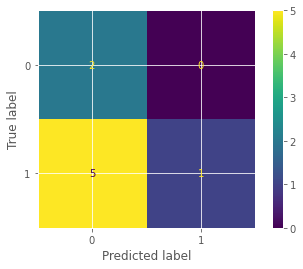

accuracy test: 0.375


In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best1.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

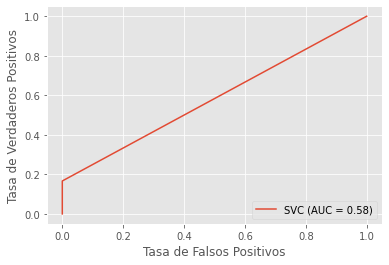

In [180]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

Y_pred=pipe_best1.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='SVC')
display.plot()
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


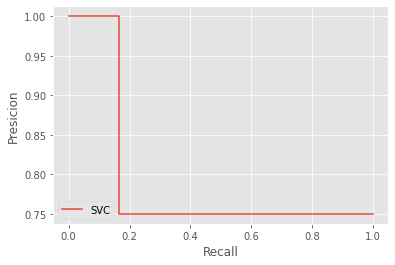

In [129]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


predictions = pipe_best1.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall,estimator_name='SVC')
disp.plot()
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.show()

In [181]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

pipe_steps = [('decsT', DecisionTreeClassifier())]
check_params ={'decsT__criterion':['gini', 'entropy'],
                  'decsT__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)


                                                


clf = RandomizedSearchCV(pipeline, check_params, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('decsT',
                                              DecisionTreeClassifier())]),
                   param_distributions={'decsT__criterion': ['gini', 'entropy'],
                                        'decsT__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   random_state=2022)

In [182]:
clf.best_params_

{'decsT__max_depth': 9, 'decsT__criterion': 'gini'}

In [183]:
pipe_best = Pipeline([ ('decsT', DecisionTreeClassifier(max_depth=9, criterion='gini'))])
pipe_best.fit(X_train,y_train)
pipe_best.score(X_test,y_test)

0.5

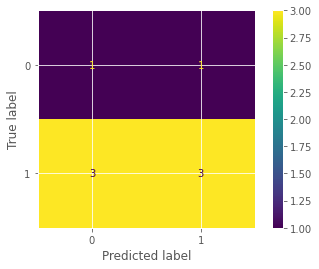

accuracy test: 0.5


In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
DecisionTreeClassifier: ROC AUC=0.500


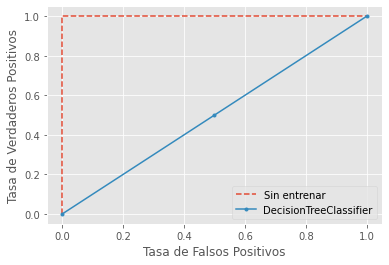

In [185]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTreeClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

DecisionTreeClassifier: f1=0.600 auc=0.812


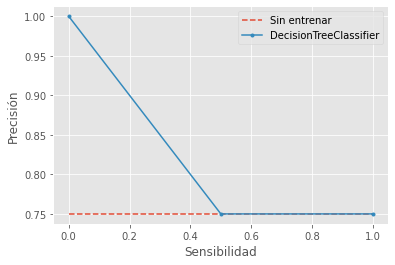

In [186]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('DecisionTreeClassifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DecisionTreeClassifier')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

In [187]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

 
pipe = Pipeline([("logistic", LogisticRegression())])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
   'logistic__penalty':('l1', 'l2', 'elasticnet', 'none'),
    # 'logistic__C': np.logspace(-4, 4, 4),
      'logistic__C':  np.arange(3, 15),
}
search = RandomizedSearchCV(pipe, param_grid, random_state=2022)
search.fit(X_train,y_train) 

RandomizedSearchCV(estimator=Pipeline(steps=[('logistic',
                                              LogisticRegression())]),
                   param_distributions={'logistic__C': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'logistic__penalty': ('l1', 'l2',
                                                              'elasticnet',
                                                              'none')},
                   random_state=2022)

In [137]:
search.best_params_

{'logistic__penalty': 'l2', 'logistic__C': 9}

In [188]:
pipe_best3 = Pipeline([("logistic", LogisticRegression(penalty='l2',C=9))])
pipe_best3.fit(X_train,y_train)
pipe_best3.score(X_test,y_test)

0.375

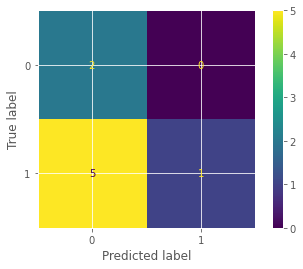

accuracy test: 0.375


In [189]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best3.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
LogisticRegression: ROC AUC=0.833


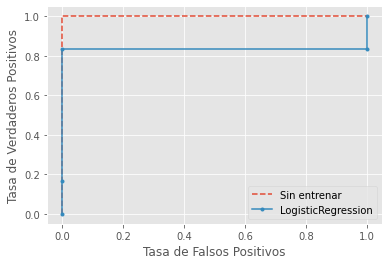

In [190]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best3.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

LogisticRegression: f1=0.286 auc=0.955


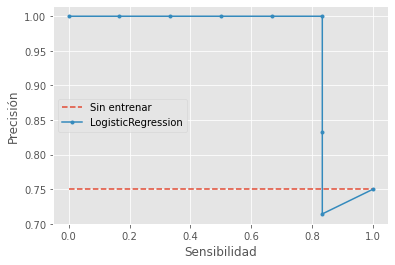

In [191]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best3.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best3.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('LogisticRegression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LogisticRegression')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipe_steps = [('rf', RandomForestClassifier())]

check_params ={'rf__criterion':['gini', 'entropy','log_loss'],
                  'rf__max_depth': np.arange(3, 15),
                  'rf__n_estimators':[0.001,0.01,0.1,1, 10, 100, 1000],
                  
                  }

pipeline = Pipeline(pipe_steps)


clf = RandomizedSearchCV(pipeline, check_params, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
                   param_distributions={'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'rf__n_estimators': [0.001, 0.01, 0.1,
                                                             1, 10, 100,
                                                             1000]},
                   random_state=2022)

In [193]:
clf.best_params_

{'rf__n_estimators': 10, 'rf__max_depth': 13, 'rf__criterion': 'gini'}

In [194]:
pipe_best4 = Pipeline([('rf', RandomForestClassifier(n_estimators=10,max_depth=13,criterion='gini'))])
pipe_best4.fit(X_train,y_train)
pipe_best4.score(X_test,y_test)

0.5

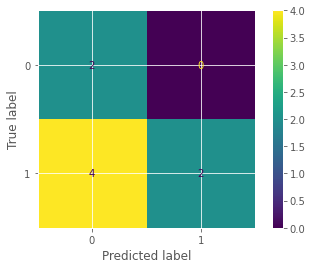

accuracy test: 0.5


In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best4.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
RandomForestClassifier: ROC AUC=0.417


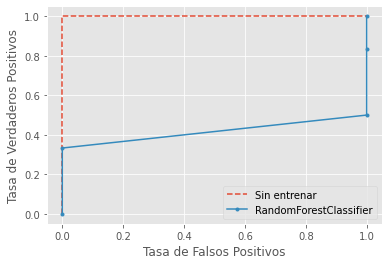

In [196]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best4.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForestClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

RandomForestClassifier: f1=0.500 auc=0.808


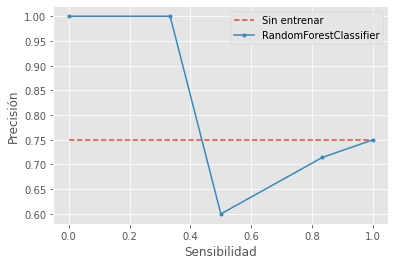

In [197]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best4.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best4.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('RandomForestClassifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RandomForestClassifier')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 261, 70)           39480     
                                                                 
 lstm_5 (LSTM)               (None, 261, 60)           31440     
                                                                 
 lstm_6 (LSTM)               (None, 261, 50)           22200     
                                                                 
 lstm_7 (LSTM)               (None, 40)                14560     
                                                                 
 dense_4 (Dense)             (None, 2)                 82        
                                                                 
Total params: 107,762
Trainable params: 107,762
Non-trainable params: 0
_________________________________________________________________
None
32 train samples
8 test samples
Epoch 1/30


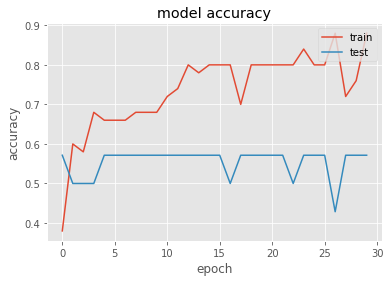

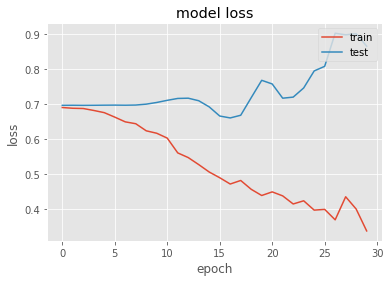

In [148]:
# create the model

model = Sequential()

# LSTM layers - 
# Long Short-Term Memory layer - Hochreiter 1997.
t_shape=np.array(all_subjects_data_reshaped).shape[1]
RSN_shape=np.array(all_subjects_data_reshaped).shape[2]

model.add(LSTM(units=70, # dimensionality of the output space 
               dropout=0.4, # Fraction of the units to drop (inputs)
               recurrent_dropout=0.15, # Fraction of the units to drop (recurent state)
               return_sequences=True, # return the last state in addition to the output
               input_shape=(t_shape,RSN_shape)))

model.add(LSTM(units=60,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

model.add(LSTM(units=50,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

model.add(LSTM(units=40,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=False))


model.add(Dense(units=2, 
                activation="sigmoid"))

model.compile(loss='binary_crossentropy', 
                optimizer=optimizers.Adam(lr=0.001), 
                metrics=['binary_accuracy'])

print(model.summary())

X_train, X_test, y_train, y_test = get_train_test(all_subjects_data_reshaped,
                                                    labels, i=8, verbrose=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30)

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [149]:
from sklearn.metrics import accuracy_score

def boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test,
                                    n_iterations=1, n_epochs=50):

  '''
  hypothesis testing function
  X_train, y_train, X_test, y_test- the data
  n_iterations- number of bootdtaping iterations 
  n_epochs - number of epochs for model's training
  '''

  accuracy=[] ## model accuracy
  roc_msrmnts_fpr=[] ## false positive rate
  roc_msrmnts_tpr=[] ## true positive rate

  # run bootstrap
  for i in range(n_iterations):
    # prepare train and test sets
    X_train, X_test, y_train, y_test=get_train_test(all_subjects_data_reshaped,
                                              labels, i=i, verbrose=False)
    # fit model
    print('fitting..')
    model.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)
    
    # evaluate model
    print('evaluating..')
    y_pred=model.predict(X_test)
    y_test_1d=[i[0] for i in y_test]
    y_pred_1d=[1.0 if i[0]>.5 else 0.0 for i in y_pred]

    fpr, tpr, _ = roc_curve(y_test_1d, y_pred_1d)
    
    acc_score = accuracy_score(y_test_1d, y_pred_1d)
    
    accuracy.append(acc_score)
    roc_msrmnts_fpr.append(fpr)
    roc_msrmnts_tpr.append(tpr)

  return accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr 



accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr  = boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test)

fitting..
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.5553 - binary_accuracy: 0.7200 - val_loss: 0.4608 - val_binary_accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.4872 - binary_accuracy: 0.7200 - val_loss: 0.5018 - val_binary_accuracy: 0.7143
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.5166 - binary_accuracy: 0.6800 - val_loss: 0.4999 - val_binary_accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.5313 - binary_accuracy: 0.6800 - val_loss: 0.4574 - val_binary_accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.4971 - binary_accuracy: 0.6800 - val_loss: 0.4080 - val_binary_accuracy: 0.5714
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.4603 - binary_accuracy: 0.8200 - val_loss: 0.4016 - val_binary_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.5001 - binary

In [150]:
def calc_p_val(stats, h0, n_iterations):
  '''
  finds the p value for the results 
  
  '''
  # calc pval
  tset, pval = ttest_1samp(stats, h0)

  return pval

p_val=calc_p_val(accuracy, 1,.5)

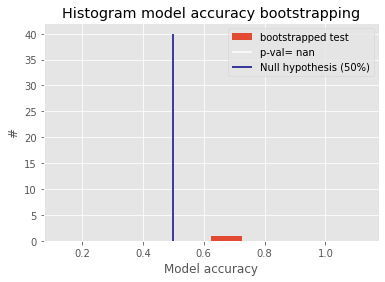

In [151]:
def plot_p_value(stats, p_val):
  '''
  plots the bootstrapping results with the null hypothesis value
  '''
  
  plt.hist(stats, label='bootstrapped test')
  plt.vlines(.5, 0, 40, color='white', label='p-val= {}'.format(p_val))
  plt.vlines(.5, 0, 40, color='navy', label='Null hypothesis (50%)')

  plt.title('Histogram model accuracy bootstrapping')
  plt.xlabel('Model accuracy')
  plt.ylabel('#')
  plt.legend()
  plt.plot()

plot_p_value(accuracy, p_val)

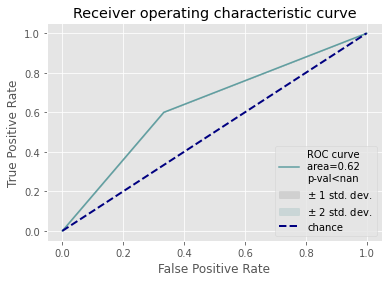

In [152]:
def plot_roc_curve(fpr_vals, tpr_vals, roc_auc, p_val):
  '''
  This function plots the median value of the roc for the boostrapped 
    results calculated above.

  fpr stand for false-positive rate
  tpr stands for true-positive rate
  roc_auc is the area under curve
  '''

  ## get the values
  N=len(fpr_vals)
  tprs=[]
  median_fpr=np.linspace(0, 1, 100)
  tprs=[interp(median_fpr, fpr_vals[i], tpr_vals[i]) for i in range(N)]
  std_tpr = np.std(tprs, axis=0)

  mean_tpr = np.mean(tprs, axis=0)
  median_tpr=np.median(tprs, axis=0)
  median_tpr[-1] = 1.0

  tprs_upper_2 = np.minimum(mean_tpr + 2*std_tpr, 1)
  tprs_lower_2 = np.maximum(mean_tpr - 2*std_tpr, 0)
  
  tprs_upper_1 = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower_1 = np.maximum(mean_tpr - std_tpr, 0)

  median_auc_roc=np.median(roc_auc)
  

  ## plot
  if p_val<0.05:
    p_val=0.05
  plt.plot(median_fpr, median_tpr, color='cadetblue', 
           label='ROC curve \narea={} \np-val<{}'.\
            format(np.round(median_auc_roc,2), 
                   np.round(p_val,2)))
  plt.fill_between(median_fpr, tprs_lower_2, tprs_upper_2, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
  
  plt.fill_between(median_fpr, tprs_lower_1, tprs_upper_1, color='cadetblue', alpha=.2,
                 label=r'$\pm$ 2 std. dev.')
  
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=r'chance')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")

  plt.show()



plot_roc_curve(roc_msrmnts_fpr, roc_msrmnts_tpr, accuracy,p_val)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.4681 - binary_accuracy: 0.8929 - val_loss: 0.8322 - val_binary_accuracy: 0.7500
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 0.5915 - binary_accuracy: 0.8571 - val_loss: 0.8208 - val_binary_accuracy: 0.7500
Epoch 3/30
1/1 [==============================] - 1s 1s/step - loss: 0.4305 - binary_accuracy: 0.8929 - val_loss: 0.8044 - val_binary_accuracy: 0.7500
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: 0.4259 - binary_accuracy: 0.8929 - val_loss: 0.7812 - val_binary_accuracy: 0.7500
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: 0.4154 - binary_accuracy: 0.8929 - val_loss: 0.7508 - val_binary_accuracy: 0.7500
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 0.5285 - binary_accuracy: 0.8571 - val_loss: 0.8112 - val_binary_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: 0.3991 - binary_accuracy:

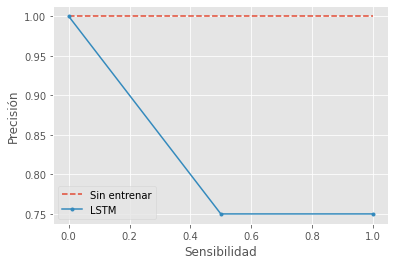

In [153]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
model.fit(X_train, y_train, validation_split=0.1, epochs=30)
    # evaluate model

y_pred=model.predict(X_test)
y_test_1d=[i[0] for i in y_test]
lr_probs=[1 if i[0]>.5 else 0 for i in y_pred]
# Nos quedamos unicamente con las predicciones positicas
# lr_probs = lr_probs[1]

# Sacamos los valores
yhat = model.predict(X_test)
yhat1=[1 if i[0]>.5 else 0 for i in yhat]
lr_precision, lr_recall, _ = precision_recall_curve(y_test_1d,lr_probs)
lr_f1, lr_auc = f1_score(y_test_1d, yhat1), auc(lr_recall, lr_precision)
# Resumimos s
print('GRU: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LSTM')
# Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.2488 - binary_accuracy: 0.9200 - val_loss: 0.8059 - val_binary_accuracy: 0.7143
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.2807 - binary_accuracy: 0.9200 - val_loss: 0.9005 - val_binary_accuracy: 0.7143
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.2896 - binary_accuracy: 0.9200 - val_loss: 0.9166 - val_binary_accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.2792 - binary_accuracy: 0.9200 - val_loss: 0.9153 - val_binary_accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.2816 - binary_accuracy: 0.9200 - val_loss: 0.9074 - val_binary_accuracy: 0.7143
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.2713 - binary_accuracy: 0.9200 - val_loss: 0.8960 - val_binary_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.2828 - binary_accuracy:

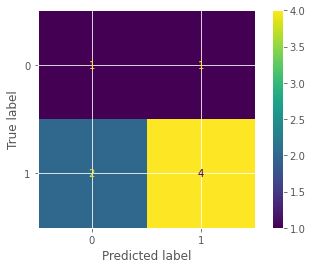

accuracy test: 0.625


In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification



# model.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)
model.fit(X_train, y_train, validation_split=0.2, epochs=50)
    # evaluate model

y_pred=model.predict(X_test)
y_test_1d=[i[0] for i in y_test]
y_pred_1d=[1 if i[0]>.5 else 0 for i in y_pred]

cm = confusion_matrix(y_test_1d, y_pred_1d)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test_1d, y_pred_1d))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 261, 70)           29820     
                                                                 
 gru_17 (GRU)                (None, 261, 60)           23760     
                                                                 
 gru_18 (GRU)                (None, 261, 50)           16800     
                                                                 
 gru_19 (GRU)                (None, 40)                11040     
                                                                 
 dense_6 (Dense)             (None, 2)                 82        
                                                                 
Total params: 81,502
Trainable params: 81,502
Non-trainable params: 0
_________________________________________________________________
None
32 train samples
8 test samples
Epoch 1/50
1/

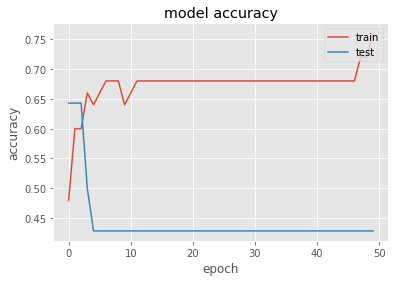

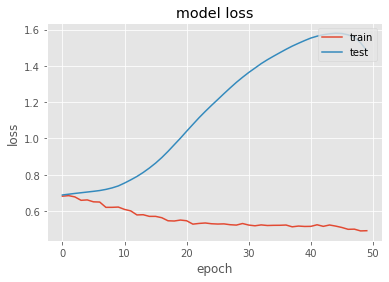

In [165]:
from tensorflow.keras.callbacks import EarlyStopping
# The GRU architecture
# create the model


modelGRU = Sequential()


t_shape=np.array(all_subjects_data_reshaped).shape[1]
RSN_shape=np.array(all_subjects_data_reshaped).shape[2]

modelGRU.add(GRU(units=70, # dimensionality of the output space 
               dropout=0.4, # Fraction of the units to drop (inputs)
               recurrent_dropout=0.15, # Fraction of the units to drop (recurent state)
               return_sequences=True, # return the last state in addition to the output
               input_shape=(t_shape,RSN_shape)))

modelGRU.add(GRU(units=60,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

modelGRU.add(GRU(units=50,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

modelGRU.add(GRU(units=40,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=False))


modelGRU.add(Dense(units=2, 
                activation="sigmoid"))

modelGRU.compile(loss='binary_crossentropy', 
                optimizer=optimizers.Adam(lr=0.001), 
                metrics=['binary_accuracy'])

print(modelGRU.summary())

X_train, X_test, y_train, y_test = get_train_test(all_subjects_data_reshaped,
                                                    labels, i=8, verbrose=True)

history = modelGRU.fit(X_train, y_train, validation_split=0.2, epochs=50)

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()




In [170]:
from sklearn.metrics import accuracy_score

def boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test,
                                    n_iterations=1, n_epochs=50):

  '''
  hypothesis testing function
  X_train, y_train, X_test, y_test- the data
  n_iterations- number of bootdtaping iterations 
  n_epochs - number of epochs for model's training
  '''

  accuracy=[] ## model accuracy
  roc_msrmnts_fpr=[] ## false positive rate
  roc_msrmnts_tpr=[] ## true positive rate

  # run bootstrap
  for i in range(n_iterations):
    # prepare train and test sets
    X_train, X_test, y_train, y_test=get_train_test(all_subjects_data_reshaped,
                                              labels, i=i, verbrose=False)
    # fit model
    print('fitting..')
    modelGRU.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)
    
    # evaluate model
    print('evaluating..')
    y_pred=model.predict(X_test)
    y_test_1d=[i[0] for i in y_test]
    y_pred_1d=[1.0 if i[0]>.5 else 0.0 for i in y_pred]

    fpr, tpr, _ = roc_curve(y_test_1d, y_pred_1d)
    
    acc_score = accuracy_score(y_test_1d, y_pred_1d)
    
    accuracy.append(acc_score)
    roc_msrmnts_fpr.append(fpr)
    roc_msrmnts_tpr.append(tpr)

  return accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr 



accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr  = boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test)

fitting..
Epoch 1/50
1/1 [==============================] - 1s 993ms/step - loss: 0.9015 - binary_accuracy: 0.8000 - val_loss: 1.3154 - val_binary_accuracy: 0.7143
Epoch 2/50
1/1 [==============================] - 1s 881ms/step - loss: 0.9610 - binary_accuracy: 0.8000 - val_loss: 1.2149 - val_binary_accuracy: 0.7143
Epoch 3/50
1/1 [==============================] - 1s 896ms/step - loss: 0.8259 - binary_accuracy: 0.8000 - val_loss: 1.0719 - val_binary_accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 1s 937ms/step - loss: 0.5885 - binary_accuracy: 0.8400 - val_loss: 0.8983 - val_binary_accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 1s 928ms/step - loss: 1.1898 - binary_accuracy: 0.6400 - val_loss: 0.6565 - val_binary_accuracy: 0.7143
Epoch 6/50
1/1 [==============================] - 1s 826ms/step - loss: 0.6310 - binary_accuracy: 0.7000 - val_loss: 0.4819 - val_binary_accuracy: 0.8571
Epoch 7/50
1/1 [==============================] - 1s 848ms/step - 

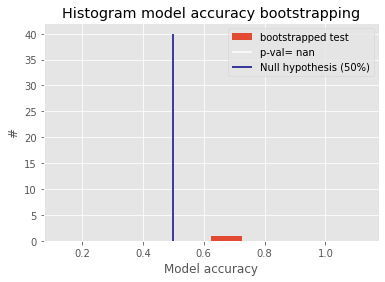

In [157]:
def plot_p_value(stats, p_val):
  '''
  plots the bootstrapping results with the null hypothesis value
  '''
  
  plt.hist(stats, label='bootstrapped test')
  plt.vlines(.5, 0, 40, color='white', label='p-val= {}'.format(p_val))
  plt.vlines(.5, 0, 40, color='navy', label='Null hypothesis (50%)')

  plt.title('Histogram model accuracy bootstrapping')
  plt.xlabel('Model accuracy')
  plt.ylabel('#')
  plt.legend()
  plt.plot()

plot_p_value(accuracy, p_val)

In [158]:
def calc_p_val(stats, h0, n_iterations):
  '''
  finds the p value for the results 
  
  '''
  # calc pval
  tset, pval = ttest_1samp(stats, h0)

  return pval

p_val=calc_p_val(accuracy, 1,.5)

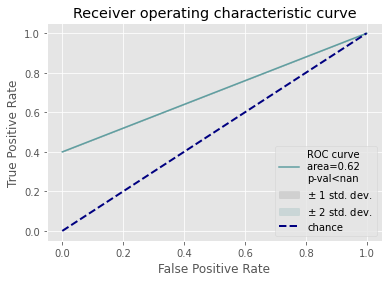

In [159]:
def plot_roc_curve(fpr_vals, tpr_vals, roc_auc, p_val):
  '''
  This function plots the median value of the roc for the boostrapped 
    results calculated above.

  fpr stand for false-positive rate
  tpr stands for true-positive rate
  roc_auc is the area under curve
  '''

  ## get the values
  N=len(fpr_vals)
  tprs=[]
  median_fpr=np.linspace(0, 1, 100)
  tprs=[interp(median_fpr, fpr_vals[i], tpr_vals[i]) for i in range(N)]
  std_tpr = np.std(tprs, axis=0)

  mean_tpr = np.mean(tprs, axis=0)
  median_tpr=np.median(tprs, axis=0)
  median_tpr[-1] = 1.0

  tprs_upper_2 = np.minimum(mean_tpr + 2*std_tpr, 1)
  tprs_lower_2 = np.maximum(mean_tpr - 2*std_tpr, 0)
  
  tprs_upper_1 = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower_1 = np.maximum(mean_tpr - std_tpr, 0)

  median_auc_roc=np.median(roc_auc)
  

  ## plot
  if p_val<0.05:
    p_val=0.05
  plt.plot(median_fpr, median_tpr, color='cadetblue', 
           label='ROC curve \narea={} \np-val<{}'.\
            format(np.round(median_auc_roc,2), 
                   np.round(p_val,2)))
  plt.fill_between(median_fpr, tprs_lower_2, tprs_upper_2, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
  
  plt.fill_between(median_fpr, tprs_lower_1, tprs_upper_1, color='cadetblue', alpha=.2,
                 label=r'$\pm$ 2 std. dev.')
  
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=r'chance')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")

  plt.show()



plot_roc_curve(roc_msrmnts_fpr, roc_msrmnts_tpr, accuracy,p_val)

Epoch 1/50
1/1 [==============================] - 1s 981ms/step - loss: 0.5539 - binary_accuracy: 0.5600 - val_loss: 0.5284 - val_binary_accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 1s 911ms/step - loss: 0.5367 - binary_accuracy: 0.5600 - val_loss: 0.5160 - val_binary_accuracy: 0.5714
Epoch 3/50
1/1 [==============================] - 1s 949ms/step - loss: 0.5324 - binary_accuracy: 0.5600 - val_loss: 0.5037 - val_binary_accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 1s 927ms/step - loss: 0.5287 - binary_accuracy: 0.7000 - val_loss: 0.4961 - val_binary_accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 1s 968ms/step - loss: 0.5190 - binary_accuracy: 0.6800 - val_loss: 0.4949 - val_binary_accuracy: 0.7143
Epoch 6/50
1/1 [==============================] - 1s 991ms/step - loss: 0.5280 - binary_accuracy: 0.6800 - val_loss: 0.4981 - val_binary_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 1s 968ms/step - loss: 0.52

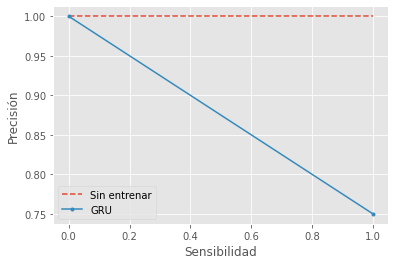

In [160]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
modelGRU.fit(X_train, y_train, validation_split=0.2, epochs=50)
    # evaluate model

y_pred=modelGRU.predict(X_test)
y_test_1d=[i[0] for i in y_test]
lr_probs=[1 if i[0]>.5 else 0 for i in y_pred]
# Nos quedamos unicamente con las predicciones positicas
# lr_probs = lr_probs[1]

# Sacamos los valores
yhat = modelGRU.predict(X_test)
yhat1=[1 if i[0]>.5 else 0 for i in yhat]
lr_precision, lr_recall, _ = precision_recall_curve(y_test_1d,lr_probs)
lr_f1, lr_auc = f1_score(y_test_1d, yhat1), auc(lr_recall, lr_precision)
# Resumimos s
print('GRU: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='GRU')
# Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

Epoch 1/50
1/1 [==============================] - 1s 952ms/step - loss: 0.2789 - binary_accuracy: 0.9200 - val_loss: 0.9214 - val_binary_accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 1s 889ms/step - loss: 0.2616 - binary_accuracy: 0.9200 - val_loss: 0.9506 - val_binary_accuracy: 0.5714
Epoch 3/50
1/1 [==============================] - 1s 859ms/step - loss: 0.2569 - binary_accuracy: 0.9200 - val_loss: 0.9805 - val_binary_accuracy: 0.5714
Epoch 4/50
1/1 [==============================] - 1s 875ms/step - loss: 0.1837 - binary_accuracy: 0.9600 - val_loss: 1.0152 - val_binary_accuracy: 0.5714
Epoch 5/50
1/1 [==============================] - 1s 874ms/step - loss: 0.3475 - binary_accuracy: 0.8800 - val_loss: 1.0423 - val_binary_accuracy: 0.5714
Epoch 6/50
1/1 [==============================] - 1s 891ms/step - loss: 0.3657 - binary_accuracy: 0.8600 - val_loss: 1.0613 - val_binary_accuracy: 0.5714
Epoch 7/50
1/1 [==============================] - 1s 866ms/step - loss: 0.24

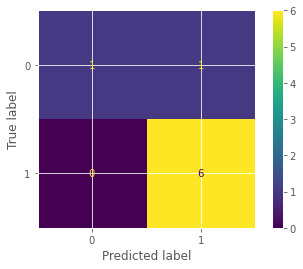

accuracy test: 0.875


In [171]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification



# model.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)
modelGRU.fit(X_train, y_train, validation_split=0.2, epochs=50)
    # evaluate model

y_pred=modelGRU.predict(X_test)
y_test_2d=[i[0] for i in y_test]
y_pred_2d=[1 if i[0]>.5 else 0 for i in y_pred]

cm = confusion_matrix(y_test_2d, y_pred_2d)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test_2d, y_pred_2d))

EXPERIMENTO CON StandardScaler

In [200]:
pipe = Pipeline([('scaler', StandardScaler()) ,('svc', SVC())])
param_grid = [
  {'svc__C':[0.001,0.01,0.1,1, 10, 100, 1000] , 'svc__kernel': ['linear']},
  {'svc__C': [0.001,0.01,0.1,1, 10, 100, 1000], 'svc__gamma': [0.1,0.01,0.001, 0.0001], 'svc__kernel': ['rbf']},
 ]
clf = RandomizedSearchCV(pipe, param_grid, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   param_distributions=[{'svc__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100, 1000],
                                         'svc__kernel': ['linear']},
                                        {'svc__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100, 1000],
                                         'svc__gamma': [0.1, 0.01, 0.001,
                                                        0.0001],
                                         'svc__kernel': ['rbf']}],
                   random_state=2022)

In [201]:
clf.best_params_

{'svc__kernel': 'linear', 'svc__C': 1}

In [202]:
pipe_best1 = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear',C=1))])
pipe_best1.fit(X_train,y_train)
pipe_best1.score(X_test,y_test)

0.375

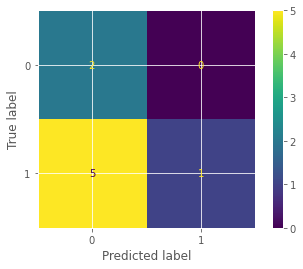

accuracy test: 0.375


In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best1.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

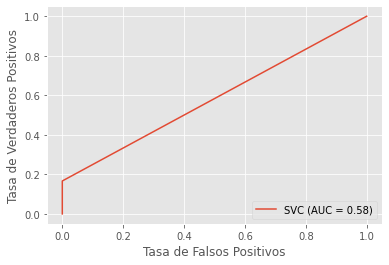

In [204]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

Y_pred=pipe_best1.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='SVC')
display.plot()
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


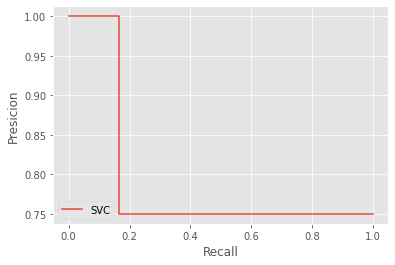

In [205]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


predictions = pipe_best1.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall,estimator_name='SVC')
disp.plot()
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.show()

Arboles de desicion 

In [206]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]
check_params ={'decsT__criterion':['gini', 'entropy'],
                  'decsT__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)


                                                


clf = RandomizedSearchCV(pipeline, check_params, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('decsT',
                                              DecisionTreeClassifier())]),
                   param_distributions={'decsT__criterion': ['gini', 'entropy'],
                                        'decsT__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   random_state=2022)

In [207]:
clf.best_params_

{'decsT__max_depth': 7, 'decsT__criterion': 'gini'}

In [208]:
pipe_best = Pipeline([('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier(max_depth=7, criterion='gini'))])
pipe_best.fit(X_train,y_train)
pipe_best.score(X_test,y_test)

0.375

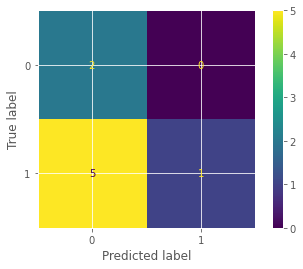

accuracy test: 0.375


In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
DecisionTreeClassifier: ROC AUC=0.583


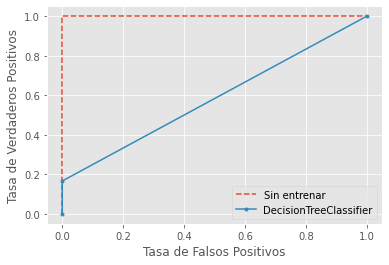

In [210]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTreeClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

Arboles de desicion: f1=0.286 auc=0.896


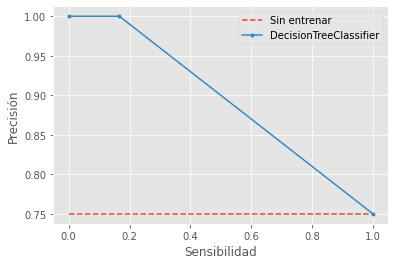

In [211]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('Arboles de desicion: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DecisionTreeClassifier')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

regresión logistica

In [212]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

 
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("logistic", LogisticRegression())])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
   'logistic__penalty':('l1', 'l2', 'elasticnet', 'none'),
    # 'logistic__C': np.logspace(-4, 4, 4),
      'logistic__C':  np.arange(3, 15),
}
search = RandomizedSearchCV(pipe, param_grid, random_state=2022)
search.fit(X_train,y_train) 

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('logistic',
                                              LogisticRegression())]),
                   param_distributions={'logistic__C': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'logistic__penalty': ('l1', 'l2',
                                                              'elasticnet',
                                                              'none')},
                   random_state=2022)

In [213]:
search.best_params_

{'logistic__penalty': 'l2', 'logistic__C': 9}

In [214]:
pipe_best3 = Pipeline([('scaler', StandardScaler()), ("logistic", LogisticRegression(penalty='l2',C=9))])
pipe_best3.fit(X_train,y_train)
pipe_best3.score(X_test,y_test)

0.375

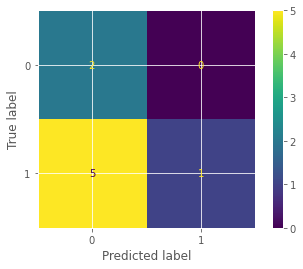

accuracy test: 0.375


In [215]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best3.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
LogisticRegression: ROC AUC=0.750


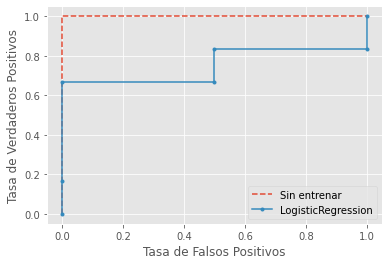

In [216]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best3.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

Arboles de desicion: f1=0.286 auc=0.925


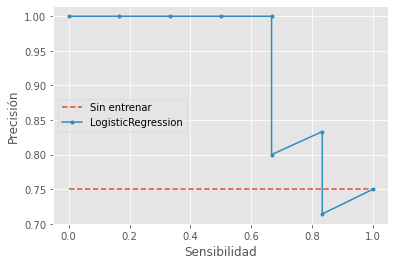

In [217]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best3.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best3.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('Arboles de desicion: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LogisticRegression')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

Arboles aleaorios 

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipe_steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]

check_params ={'rf__criterion':['gini', 'entropy','log_loss'],
                  'rf__max_depth': np.arange(3, 15),
                  'rf__n_estimators':[0.001,0.01,0.1,1, 10, 100, 1000],
                  
                  }

pipeline = Pipeline(pipe_steps)


clf = RandomizedSearchCV(pipeline, check_params, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf', RandomForestClassifier())]),
                   param_distributions={'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'rf__n_estimators': [0.001, 0.01, 0.1,
                                                             1, 10, 100,
                                                             1000]},
                   random_state=2022)

In [219]:
clf.best_params_

{'rf__n_estimators': 10, 'rf__max_depth': 5, 'rf__criterion': 'entropy'}

In [220]:
pipe_best4 = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=10,max_depth=5,criterion='entropy'))])
pipe_best4.fit(X_train,y_train)
pipe_best4.score(X_test,y_test)

0.25

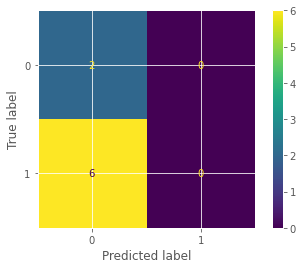

accuracy test: 0.25


In [221]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best4.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
RandomForestClassifier: ROC AUC=0.417


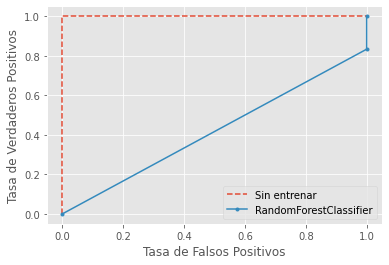

In [222]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best4.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForestClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

RandomForestClassifier: f1=0.000 auc=0.836


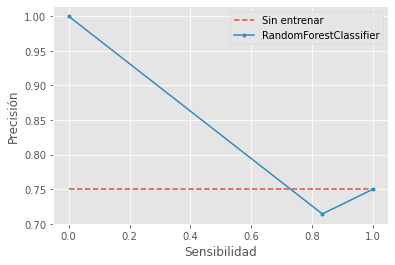

In [223]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best4.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best4.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('RandomForestClassifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RandomForestClassifier')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

# Experimento con reducción de dimensión


In [224]:

from sklearn.decomposition import PCA

In [225]:
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA()) ,('svc', SVC())])
param_grid = [
  {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['linear'],'pca__n_components':[2,3,5,7,11,13,17,23,29,31]},
  {'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.1,0.01,0.001, 0.0001], 'svc__kernel': ['rbf'],'pca__n_components':[2,3,5,7,11,13,17,23,29,31]},
 ]
clf = RandomizedSearchCV(pipe, param_grid, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()), ('svc', SVC())]),
                   param_distributions=[{'pca__n_components': [2, 3, 5, 7, 11,
                                                               13, 17, 23, 29,
                                                               31],
                                         'svc__C': [1, 10, 100, 1000],
                                         'svc__kernel': ['linear']},
                                        {'pca__n_components': [2, 3, 5, 7, 11,
                                                               13, 17, 23, 29,
                                                               31],
                                         'svc__C': [1, 10, 100, 1000],
                                         'svc__gamma': [0.1, 0.01, 0.001,
                                                        0.0001],
                                         'svc__kernel': ['rbf']}],
                   random_state=2022)

In [226]:
clf.best_params_

{'svc__kernel': 'linear', 'svc__C': 100, 'pca__n_components': 13}

In [227]:
pipe_best = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=13)), ('svc', SVC(kernel='linear',C=100))])
pipe_best.fit(X_train,y_train)
pipe_best.score(X_test,y_test)

0.5

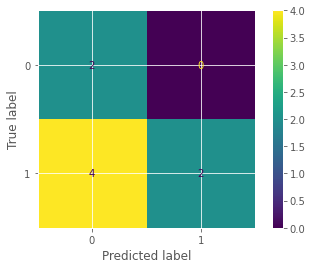

accuracy test: 0.5


In [228]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))


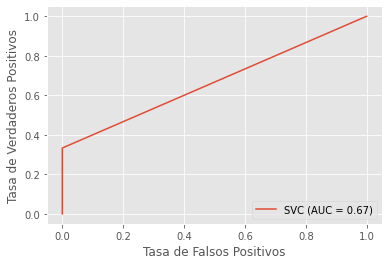

In [229]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

Y_pred=pipe_best.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='SVC')
display.plot()
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


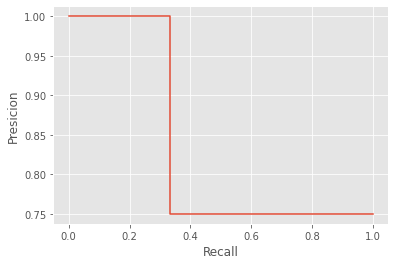

In [230]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


predictions = pipe_best.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.show()

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

pipe_steps = [('scaler', StandardScaler()),('pca',PCA()), ('decsT', DecisionTreeClassifier())]
check_params ={'decsT__criterion':['gini', 'entropy','log_loss'],
                  'decsT__max_depth': np.arange(3, 15),
                  'pca__n_components':[2,3,5,7,11,13,17,23,29,31],
                  }

pipeline = Pipeline(pipe_steps)

clf = RandomizedSearchCV(pipeline, check_params, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('decsT',
                                              DecisionTreeClassifier())]),
                   param_distributions={'decsT__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                                        'decsT__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'pca__n_components': [2, 3, 5, 7, 11,
                                                              13, 17, 23, 29,
                                                              31]},
                   random_state=2022)

In [232]:
clf.best_params_

{'pca__n_components': 3, 'decsT__max_depth': 9, 'decsT__criterion': 'entropy'}

In [233]:
pipe_best = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=3)),('decsT', DecisionTreeClassifier(max_depth=9, criterion='entropy'))])
pipe_best.fit(X_train,y_train)
pipe_best.score(X_test,y_test)

0.375

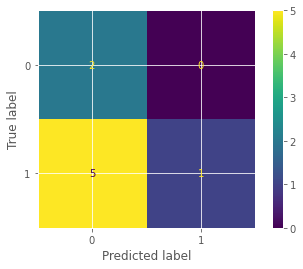

accuracy test: 0.375


In [234]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
DecisionTreeClassifier: ROC AUC=0.583


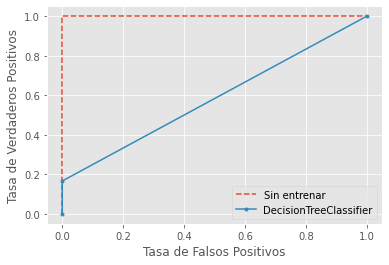

In [235]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTreeClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

DecisionTreeClassifier: f1=0.286 auc=0.896


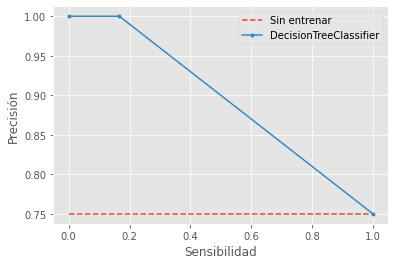

In [236]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('DecisionTreeClassifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DecisionTreeClassifier')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

In [237]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),('pca',PCA()),("logistic", LogisticRegression())])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
   'logistic__penalty':('l1', 'l2', 'elasticnet', 'none'),
    # 'logistic__C': np.logspace(-4, 4, 4),
      'logistic__C':  np.arange(3, 15),
      'pca__n_components':[2,3,5,7,11,13,17,23,29,31]
}
clf = RandomizedSearchCV(pipe, param_grid, random_state=2022)
clf.fit(X_train,y_train) 

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('logistic',
                                              LogisticRegression())]),
                   param_distributions={'logistic__C': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'logistic__penalty': ('l1', 'l2',
                                                              'elasticnet',
                                                              'none'),
                                        'pca__n_components': [2, 3, 5, 7, 11,
                                                              13, 17, 23, 29,
                                                              31]},
                   random_state=2022)

In [238]:
clf.best_params_

{'pca__n_components': 11, 'logistic__penalty': 'none', 'logistic__C': 9}

In [239]:
pipe_best = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=11)) ,("logistic", LogisticRegression(penalty='none',C=9))])
pipe_best.fit(X_train,y_train)
pipe_best.score(X_test,y_test)

0.375

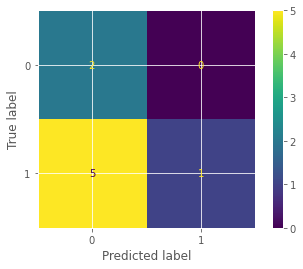

accuracy test: 0.375


In [240]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
LogisticRegression: ROC AUC=0.333


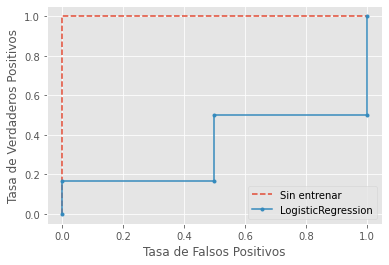

In [241]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LogisticRegression')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

LogisticRegression: f1=0.286 auc=0.725


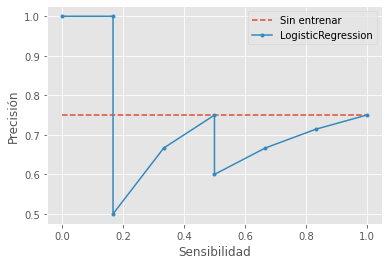

In [242]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('LogisticRegression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LogisticRegression')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

In [243]:
pipe_steps = [('scaler', StandardScaler()), ('pca',PCA()),('rf', RandomForestClassifier())]

check_params ={'rf__criterion':['gini', 'entropy','log_loss'],
                  'rf__max_depth': np.arange(3, 15),
                  'rf__n_estimators':[0.001,0.01,0.1,1, 10, 100, 1000],
                  'pca__n_components':[2,3,5,7,11,13,17,23,29,31]
                  
                  }

pipeline = Pipeline(pipe_steps)


clf = RandomizedSearchCV(pipeline, check_params, random_state=2022)
clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('rf', RandomForestClassifier())]),
                   param_distributions={'pca__n_components': [2, 3, 5, 7, 11,
                                                              13, 17, 23, 29,
                                                              31],
                                        'rf__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'rf__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'rf__n_estimators': [0.001, 0.01, 0.1,
                                                             1, 10, 100,
                                                             1000]},
                   random_state=2022)

In [244]:
clf.best_params_

{'rf__n_estimators': 10,
 'rf__max_depth': 10,
 'rf__criterion': 'entropy',
 'pca__n_components': 7}

In [245]:
pipe_best = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=7)),('rf', RandomForestClassifier(n_estimators=10,max_depth=10,criterion='entropy'))])
pipe_best.fit(X_train,y_train)
pipe_best.score(X_test,y_test)

0.75

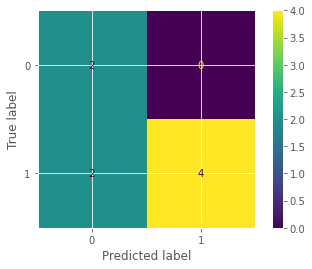

accuracy test: 0.75


In [246]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

Y_pred=pipe_best.predict(X_test)

cm = confusion_matrix(y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test, Y_pred))

Sin entrenar: ROC AUC=1.000
RandomForestClassifier: ROC AUC=1.000


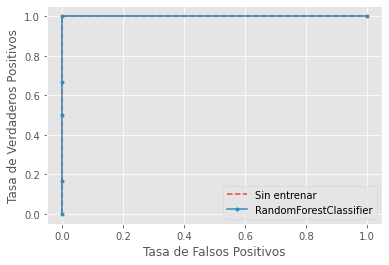

In [247]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# ns_probs = [0 for _ in range(len(y_test))]
ns_probs = y_test

# Predecimos las probabilidades
lr_probs = pipe_best.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForestClassifier')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

RandomForestClassifier: f1=0.800 auc=1.000


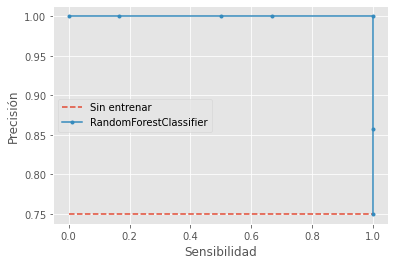

In [248]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
lr_probs = pipe_best.predict_proba(X_test)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = pipe_best.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('RandomForestClassifier: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RandomForestClassifier')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

In [249]:

t_shape=np.array(all_subjects_data_reshaped).shape[1]
RSN_shape=np.array(all_subjects_data_reshaped).shape[2]
Xs_trainf = np.reshape(Xs_train, (len(Xs_train), t_shape, RSN_shape))
Xs_testf = np.reshape(Xs_test, (len(Xs_test), t_shape, RSN_shape))

Xs_trainf = Xs_trainf.astype('float32')
Xs_testf = Xs_testf.astype('float32')



# Converts class vectors to binary class matrices.
ys_trainf = utils.to_categorical(ys_train, 2)
ys_testf = utils.to_categorical(ys_test, 2)

In [250]:
from tensorflow.keras.callbacks import EarlyStopping
# The GRU architecture
# create the model


modelGRU = Sequential()


t_shape=np.array(all_subjects_data_reshaped).shape[1]
RSN_shape=np.array(all_subjects_data_reshaped).shape[2]

modelGRU.add(GRU(units=70, # dimensionality of the output space 
               dropout=0.4, # Fraction of the units to drop (inputs)
               recurrent_dropout=0.15, # Fraction of the units to drop (recurent state)
               return_sequences=True, # return the last state in addition to the output
               input_shape=(t_shape,RSN_shape)))

modelGRU.add(GRU(units=60,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

modelGRU.add(GRU(units=50,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

modelGRU.add(GRU(units=40,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=False))


modelGRU.add(Dense(units=2, 
                activation="sigmoid"))

modelGRU.compile(loss='binary_crossentropy', 
                optimizer=optimizers.Adam(lr=0.001), 
                metrics=['binary_accuracy'])

print(modelGRU.summary())





Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_20 (GRU)                (None, 261, 70)           29820     
                                                                 
 gru_21 (GRU)                (None, 261, 60)           23760     
                                                                 
 gru_22 (GRU)                (None, 261, 50)           16800     
                                                                 
 gru_23 (GRU)                (None, 40)                11040     
                                                                 
 dense_7 (Dense)             (None, 2)                 82        
                                                                 
Total params: 81,502
Trainable params: 81,502
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
1/1 [==============================] - 24s 24s/step - loss: 0.6849 - binary_accuracy: 0.5400 - val_loss: 0.6916 - val_binary_accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.6945 - binary_accuracy: 0.5600 - val_loss: 0.6904 - val_binary_accuracy: 0.5714
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.6910 - binary_accuracy: 0.4600 - val_loss: 0.6892 - val_binary_accuracy: 0.5714
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.6909 - binary_accuracy: 0.5200 - val_loss: 0.6879 - val_binary_accuracy: 0.5714
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.6669 - binary_accuracy: 0.6000 - val_loss: 0.6869 - val_binary_accuracy: 0.5714
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.6761 - binary_accuracy: 0.6000 - val_loss: 0.6860 - val_binary_accuracy: 0.5714
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.6470 - binary_accurac

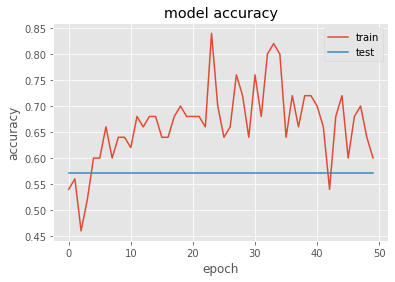

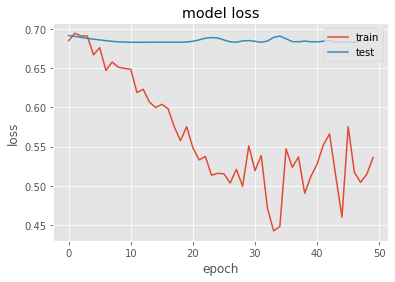

In [251]:
history = modelGRU.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=50)#, callbacks=[custom_early_stopping])

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.5363 - binary_accuracy: 0.6400 - val_loss: 0.6994 - val_binary_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.5206 - binary_accuracy: 0.7200 - val_loss: 0.6977 - val_binary_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.5352 - binary_accuracy: 0.5000 - val_loss: 0.6975 - val_binary_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.5132 - binary_accuracy: 0.7000 - val_loss: 0.6974 - val_binary_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.5267 - binary_accuracy: 0.6400 - val_loss: 0.6972 - val_binary_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.5045 - binary_accuracy: 0.6800 - val_loss: 0.6966 - val_binary_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.5305 - binary_accuracy:

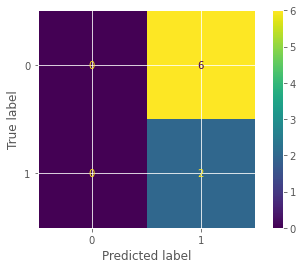

accuracy test: 0.25


In [253]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification



# model.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)
modelGRU.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=50)
    # evaluate model

y_pred=modelGRU.predict(Xs_testf)
y_test_1d=[i[0] for i in ys_testf]
y_pred_1d=[1.0 if i[0]>.5 else 0.0 for i in y_pred]

cm = confusion_matrix(y_test_1d, y_pred_1d, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test_1d, y_pred_1d))

In [254]:
from sklearn.metrics import accuracy_score

def boostrapping_hypothesis_testing(Xs_trainf, ys_trainf, Xs_testf, ys_testf,
                                    n_iterations=1, n_epochs=50):

  '''
  hypothesis testing function
  X_train, y_train, X_test, y_test- the data
  n_iterations- number of bootdtaping iterations 
  n_epochs - number of epochs for model's training
  '''

  accuracy=[] ## model accuracy
  roc_msrmnts_fpr=[] ## false positive rate
  roc_msrmnts_tpr=[] ## true positive rate

  # run bootstrap
  for i in range(n_iterations):
    # prepare train and test sets
    Xs_trainf, Xs_testf, ys_trainf, ys_testf=get_train_test(all_subjects_data_reshaped,
                                              labels, i=i, verbrose=False)
    # fit model
    print('fitting..')
    modelGRU.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=n_epochs)
    
    # evaluate model
    print('evaluating..')
    y_pred=modelGRU.predict(Xs_testf)
    y_test_1d=[i[0] for i in ys_testf]
    y_pred_1d=[1.0 if i[0]>.5 else 0.0 for i in y_pred]

    fpr, tpr, _ = roc_curve(y_test_1d, y_pred_1d)
    
    acc_score = accuracy_score(y_test_1d, y_pred_1d)
    
    accuracy.append(acc_score)
    roc_msrmnts_fpr.append(fpr)
    roc_msrmnts_tpr.append(tpr)

  return accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr 



accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr  = boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test)

fitting..
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.5218 - binary_accuracy: 0.6800 - val_loss: 1.0033 - val_binary_accuracy: 0.1429
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.5283 - binary_accuracy: 0.6800 - val_loss: 1.0014 - val_binary_accuracy: 0.1429
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.5214 - binary_accuracy: 0.6800 - val_loss: 0.9998 - val_binary_accuracy: 0.1429
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.5245 - binary_accuracy: 0.6800 - val_loss: 0.9986 - val_binary_accuracy: 0.1429
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.5211 - binary_accuracy: 0.6800 - val_loss: 1.0002 - val_binary_accuracy: 0.1429
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.5225 - binary_accuracy: 0.6800 - val_loss: 1.0033 - val_binary_accuracy: 0.1429
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.5210 - binary

In [255]:
def calc_p_val(stats, h0, n_iterations):
  '''
  finds the p value for the results 
  
  '''
  # calc pval
  tset, pval = ttest_1samp(stats, h0)

  return pval

p_val=calc_p_val(accuracy,1,.5)

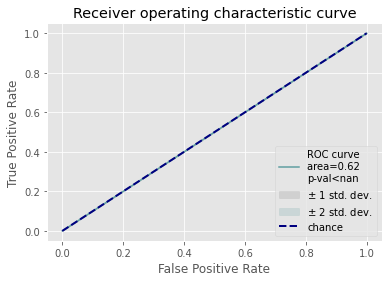

In [256]:
def plot_roc_curve(fpr_vals, tpr_vals, roc_auc, p_val):
  '''
  This function plots the median value of the roc for the boostrapped 
    results calculated above.

  fpr stand for false-positive rate
  tpr stands for true-positive rate
  roc_auc is the area under curve
  '''

  ## get the values
  N=len(fpr_vals)
  tprs=[]
  median_fpr=np.linspace(0, 1, 100)
  tprs=[interp(median_fpr, fpr_vals[i], tpr_vals[i]) for i in range(N)]
  std_tpr = np.std(tprs, axis=0)

  mean_tpr = np.mean(tprs, axis=0)
  median_tpr=np.median(tprs, axis=0)
  median_tpr[-1] = 1.0

  tprs_upper_2 = np.minimum(mean_tpr + 2*std_tpr, 1)
  tprs_lower_2 = np.maximum(mean_tpr - 2*std_tpr, 0)
  
  tprs_upper_1 = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower_1 = np.maximum(mean_tpr - std_tpr, 0)

  median_auc_roc=np.median(roc_auc)
  

  ## plot
  if p_val<0.05:
    p_val=0.05
  plt.plot(median_fpr, median_tpr, color='cadetblue', 
           label='ROC curve \narea={} \np-val<{}'.\
            format(np.round(median_auc_roc,2), 
                   np.round(p_val,2)))
  plt.fill_between(median_fpr, tprs_lower_2, tprs_upper_2, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
  
  plt.fill_between(median_fpr, tprs_lower_1, tprs_upper_1, color='cadetblue', alpha=.2,
                 label=r'$\pm$ 2 std. dev.')
  
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=r'chance')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")

  plt.show()



plot_roc_curve(roc_msrmnts_fpr, roc_msrmnts_tpr, accuracy,p_val)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.4998 - binary_accuracy: 0.7200 - val_loss: 0.7009 - val_binary_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.4487 - binary_accuracy: 0.7800 - val_loss: 0.7067 - val_binary_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 0.5089 - binary_accuracy: 0.6000 - val_loss: 0.7155 - val_binary_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.4565 - binary_accuracy: 0.7200 - val_loss: 0.7228 - val_binary_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.4654 - binary_accuracy: 0.7200 - val_loss: 0.7267 - val_binary_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.4836 - binary_accuracy: 0.7200 - val_loss: 0.7250 - val_binary_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.4976 - binary_accuracy:

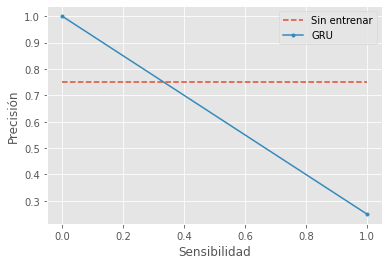

In [258]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
modelGRU.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=50)
    # evaluate model

y_pred=modelGRU.predict(Xs_testf)
y_test_1d=[i[0] for i in ys_testf]
lr_probs=[1 if i[0]>.5 else 0 for i in y_pred]
# Nos quedamos unicamente con las predicciones positicas
# lr_probs = lr_probs[1]

# Sacamos los valores
yhat = modelGRU.predict(Xs_testf)
yhat1=[1 if i[0]>.5 else 0 for i in yhat]
lr_precision, lr_recall, _ = precision_recall_curve(y_test_1d,lr_probs)
lr_f1, lr_auc = f1_score(y_test_1d, yhat1), auc(lr_recall, lr_precision)
# Resumimos s
print('GRU: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='GRU')
# Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 261, 70)           39480     
                                                                 
 lstm_9 (LSTM)               (None, 261, 60)           31440     
                                                                 
 lstm_10 (LSTM)              (None, 261, 50)           22200     
                                                                 
 lstm_11 (LSTM)              (None, 40)                14560     
                                                                 
 dense_8 (Dense)             (None, 2)                 82        
                                                                 
Total params: 107,762
Trainable params: 107,762
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1/1 [===========================

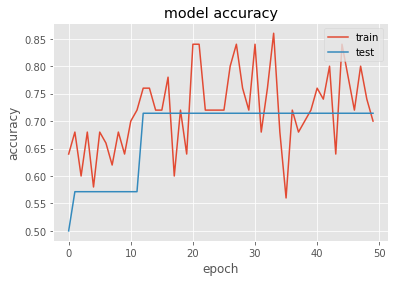

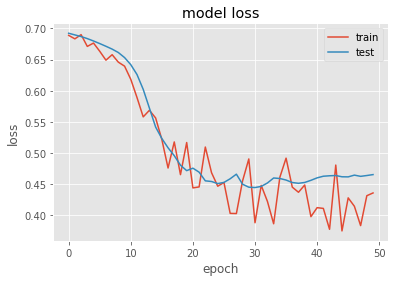

In [259]:

modelLSTM = Sequential()

# LSTM layers - 
# Long Short-Term Memory layer - Hochreiter 1997.
t_shape=np.array(all_subjects_data_reshaped).shape[1]
RSN_shape=np.array(all_subjects_data_reshaped).shape[2]



modelLSTM.add(LSTM(units=70, # dimensionality of the output space 
               dropout=0.4, # Fraction of the units to drop (inputs)
               recurrent_dropout=0.15, # Fraction of the units to drop (recurent state)
               return_sequences=True, # return the last state in addition to the output
               input_shape=(t_shape,RSN_shape)))

modelLSTM.add(LSTM(units=60,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

modelLSTM.add(LSTM(units=50,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=True))

modelLSTM.add(LSTM(units=40,  
               dropout=0.4, 
               recurrent_dropout=0.15, 
               return_sequences=False))


modelLSTM.add(Dense(units=2, 
                activation="sigmoid"))

modelLSTM.compile(loss='binary_crossentropy', 
                optimizer=optimizers.Adam(lr=0.001), 
                metrics=['binary_accuracy'])

print(modelLSTM.summary())



history = modelLSTM.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=50)#, callbacks=[custom_early_stopping])

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.4091 - binary_accuracy: 0.8036 - val_loss: 0.3290 - val_binary_accuracy: 0.7500
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 0.4160 - binary_accuracy: 0.7679 - val_loss: 0.3413 - val_binary_accuracy: 0.7500
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 0.3969 - binary_accuracy: 0.7857 - val_loss: 0.3564 - val_binary_accuracy: 0.7500
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.3998 - binary_accuracy: 0.7857 - val_loss: 0.3892 - val_binary_accuracy: 0.7500
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.4088 - binary_accuracy: 0.7143 - val_loss: 0.4204 - val_binary_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.4312 - binary_accuracy: 0.7321 - val_loss: 0.4681 - val_binary_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.4307 - binary_accuracy:

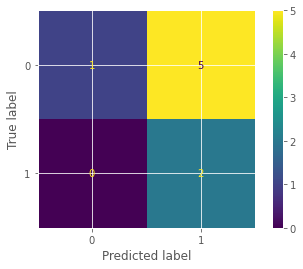

accuracy test: 0.375


In [260]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification



# model.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)
modelLSTM.fit(Xs_trainf, ys_trainf, validation_split=0.1, epochs=30)
    # evaluate model

y_pred=modelLSTM.predict(Xs_testf)
y_test_1d=[i[0] for i in ys_testf]
y_pred_1d=[1 if i[0]>.5 else 0 for i in y_pred]

cm = confusion_matrix(y_test_1d, y_pred_1d, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print("accuracy test:",accuracy_score(y_test_1d, y_pred_1d))

In [261]:
from sklearn.metrics import accuracy_score

def boostrapping_hypothesis_testing(Xs_trainf, ys_trainf, Xs_testf, ys_testf,
                                    n_iterations=1, n_epochs=50):

  '''
  hypothesis testing function
  X_train, y_train, X_test, y_test- the data
  n_iterations- number of bootdtaping iterations 
  n_epochs - number of epochs for model's training
  '''

  accuracy=[] ## model accuracy
  roc_msrmnts_fpr=[] ## false positive rate
  roc_msrmnts_tpr=[] ## true positive rate

  # run bootstrap
  for i in range(n_iterations):
    # prepare train and test sets
    Xs_trainf, Xs_testf, ys_trainf, ys_testf=get_train_test(all_subjects_data_reshaped,
                                              labels, i=i, verbrose=False)
    # fit model
    print('fitting..')
    modelLSTM.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=n_epochs)
    
    # evaluate model
    print('evaluating..')
    y_pred=modelLSTM.predict(Xs_testf)
    y_test_1d=[i[0] for i in ys_testf]
    y_pred_1d=[1.0 if i[0]>.5 else 0.0 for i in y_pred]

    fpr, tpr, _ = roc_curve(y_test_1d, y_pred_1d)
    
    acc_score = accuracy_score(y_test_1d, y_pred_1d)
    
    accuracy.append(acc_score)
    roc_msrmnts_fpr.append(fpr)
    roc_msrmnts_tpr.append(tpr)

  return accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr 



accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr  = boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test)

fitting..
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.5414 - binary_accuracy: 0.6400 - val_loss: 0.4379 - val_binary_accuracy: 0.7143
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.5088 - binary_accuracy: 0.6400 - val_loss: 0.5998 - val_binary_accuracy: 0.7143
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 0.5233 - binary_accuracy: 0.6800 - val_loss: 1.1566 - val_binary_accuracy: 0.7143
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.6328 - binary_accuracy: 0.7800 - val_loss: 1.1464 - val_binary_accuracy: 0.7143
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.6541 - binary_accuracy: 0.6400 - val_loss: 1.0096 - val_binary_accuracy: 0.7143
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.4767 - binary_accuracy: 0.6800 - val_loss: 0.9677 - val_binary_accuracy: 0.7143
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.4830 - binary

In [262]:
def calc_p_val(stats, h0, n_iterations):
  '''
  finds the p value for the results 
  
  '''
  # calc pval
  tset, pval = ttest_1samp(stats, h0)

  return pval

p_val=calc_p_val(accuracy,1,.5)

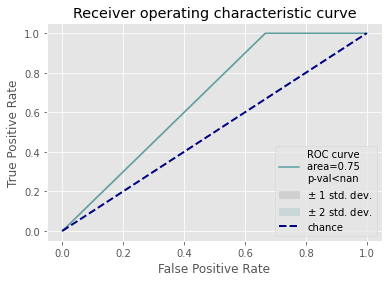

In [263]:
def plot_roc_curve(fpr_vals, tpr_vals, roc_auc, p_val):
  '''
  This function plots the median value of the roc for the boostrapped 
    results calculated above.

  fpr stand for false-positive rate
  tpr stands for true-positive rate
  roc_auc is the area under curve
  '''

  ## get the values
  N=len(fpr_vals)
  tprs=[]
  median_fpr=np.linspace(0, 1, 100)
  tprs=[interp(median_fpr, fpr_vals[i], tpr_vals[i]) for i in range(N)]
  std_tpr = np.std(tprs, axis=0)

  mean_tpr = np.mean(tprs, axis=0)
  median_tpr=np.median(tprs, axis=0)
  median_tpr[-1] = 1.0

  tprs_upper_2 = np.minimum(mean_tpr + 2*std_tpr, 1)
  tprs_lower_2 = np.maximum(mean_tpr - 2*std_tpr, 0)
  
  tprs_upper_1 = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower_1 = np.maximum(mean_tpr - std_tpr, 0)

  median_auc_roc=np.median(roc_auc)
  

  ## plot
  if p_val<0.05:
    p_val=0.05
  plt.plot(median_fpr, median_tpr, color='cadetblue', 
           label='ROC curve \narea={} \np-val<{}'.\
            format(np.round(median_auc_roc,2), 
                   np.round(p_val,2)))
  plt.fill_between(median_fpr, tprs_lower_2, tprs_upper_2, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
  
  plt.fill_between(median_fpr, tprs_lower_1, tprs_upper_1, color='cadetblue', alpha=.2,
                 label=r'$\pm$ 2 std. dev.')
  
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=r'chance')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")

  plt.show()



plot_roc_curve(roc_msrmnts_fpr, roc_msrmnts_tpr, accuracy,p_val)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.4711 - binary_accuracy: 0.7000 - val_loss: 0.6861 - val_binary_accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.5150 - binary_accuracy: 0.5600 - val_loss: 0.6869 - val_binary_accuracy: 0.5714
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.5084 - binary_accuracy: 0.6800 - val_loss: 0.6862 - val_binary_accuracy: 0.5714
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.4917 - binary_accuracy: 0.7000 - val_loss: 0.6851 - val_binary_accuracy: 0.5714
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.4866 - binary_accuracy: 0.7000 - val_loss: 0.6837 - val_binary_accuracy: 0.5714
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.5382 - binary_accuracy: 0.5600 - val_loss: 0.6831 - val_binary_accuracy: 0.5714
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.5052 - binary_accuracy:

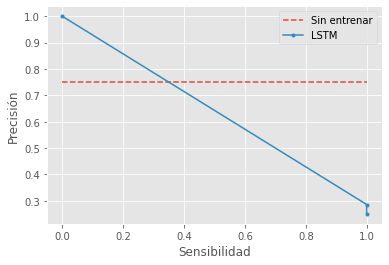

In [266]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
#Generamos dataset

# predecimos probabilidades
modelGRU.fit(Xs_trainf, ys_trainf, validation_split=0.2, epochs=50)
    # evaluate model

y_pred=modelGRU.predict(Xs_testf)
y_test_1d=[i[0] for i in ys_testf]
lr_probs=[1 if i[0]>.5 else 0 for i in y_pred]
# Nos quedamos unicamente con las predicciones positicas
# lr_probs = lr_probs[1]

# Sacamos los valores
yhat = modelGRU.predict(Xs_testf)
yhat1=[1 if i[0]>.5 else 0 for i in yhat]
lr_precision, lr_recall, _ = precision_recall_curve(y_test_1d,lr_probs)
lr_f1, lr_auc = f1_score(y_test_1d, yhat1), auc(lr_recall, lr_precision)
# Resumimos s
print('LSTM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LSTM')
# Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()